In [1]:
import datacube


In [2]:
dc = datacube.Datacube (app='day2')

In [3]:
from deafrica_tools.datahandling import load_ard

In [4]:
dataset= load_ard(dc,
         products=['ls9_sr'],
                   min_gooddata=0,
                   output_crs='epsg:6933',
                   resolution=(-30,30),
                   y=(-1.29911, -1.31275),
                   x=(36.84651, 36.86437),
                   time=('2022-01','2022-03'),
                   measurements = ['red','green','blue','nir','swir_1']
                   )

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls9_sr
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 5 time steps


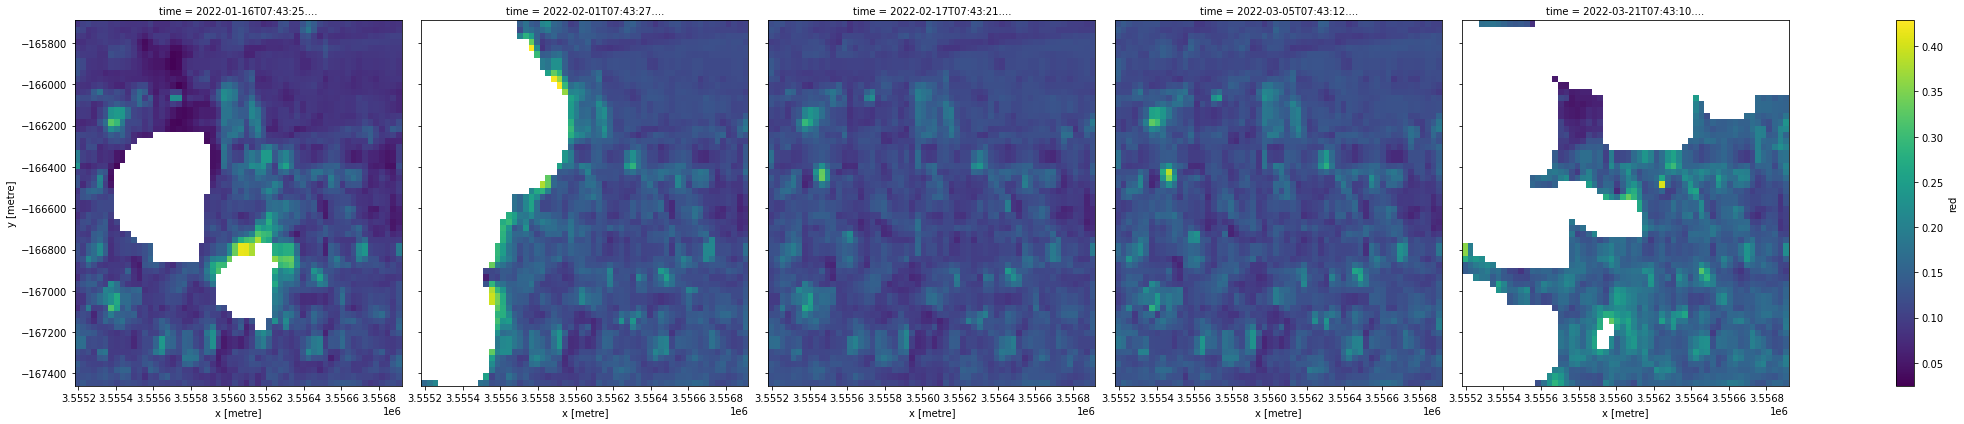

In [5]:
dataset['red'].plot(col='time',size=6)

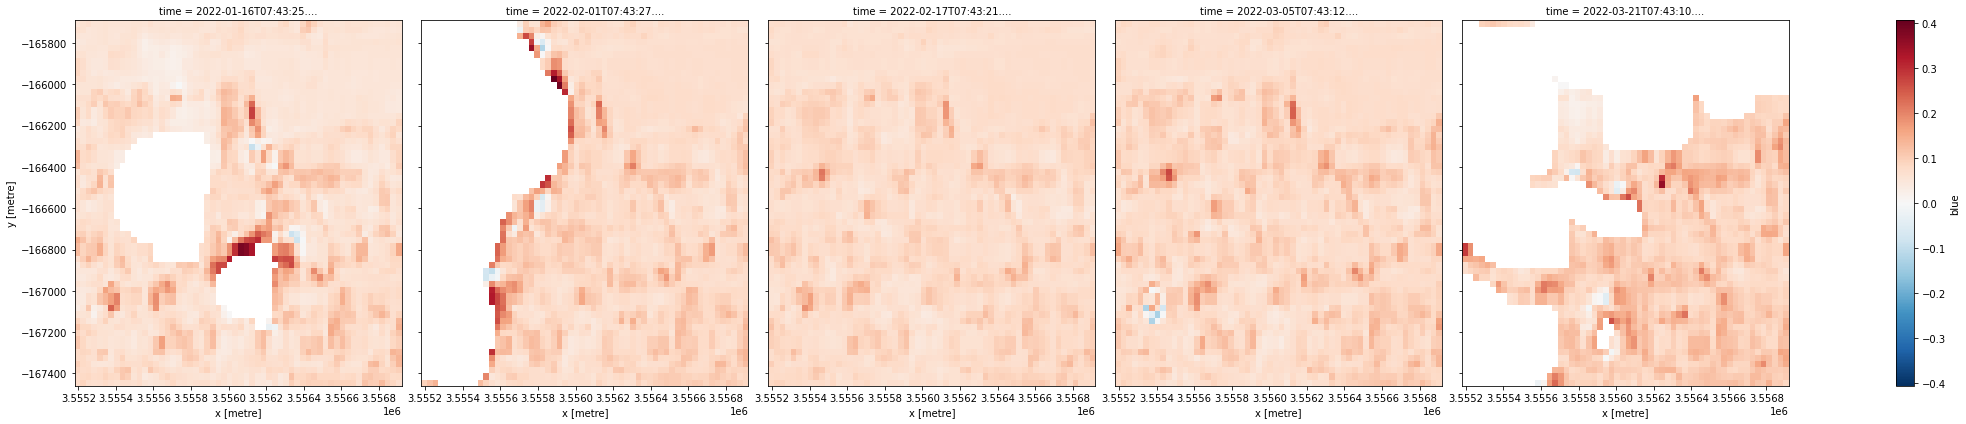

In [6]:
dataset['blue'].plot(col='time',size=6)

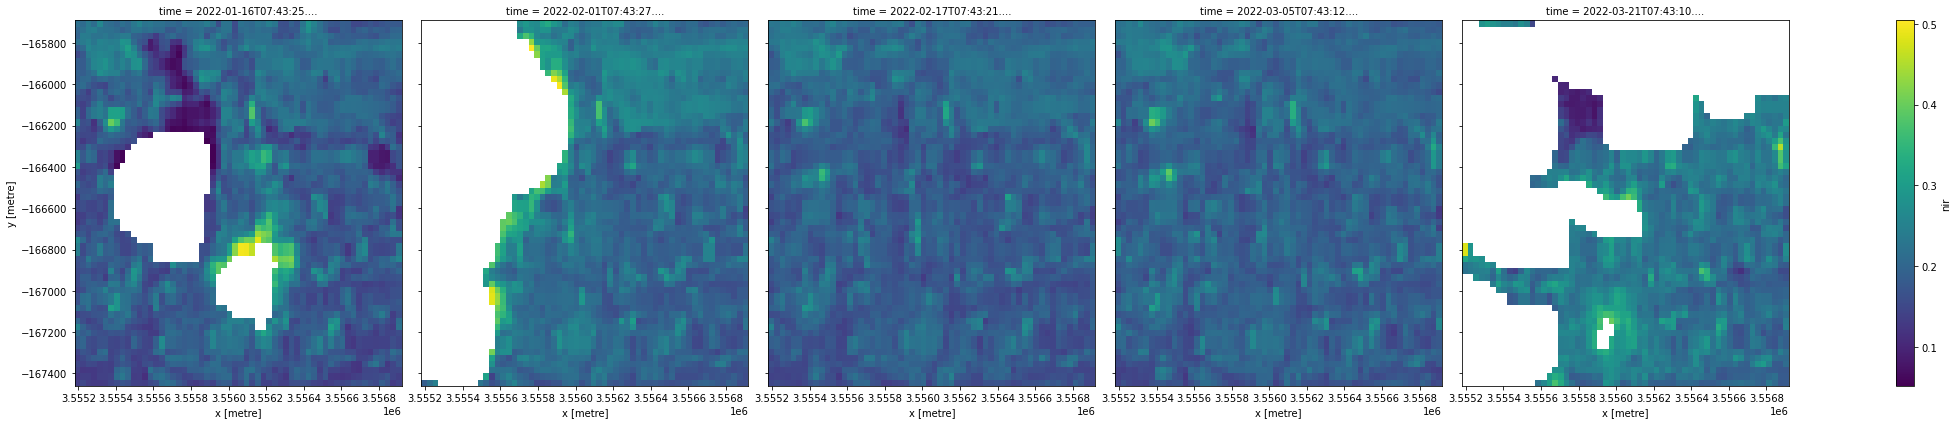

In [7]:
dataset['nir'].plot(col='time',size=6)

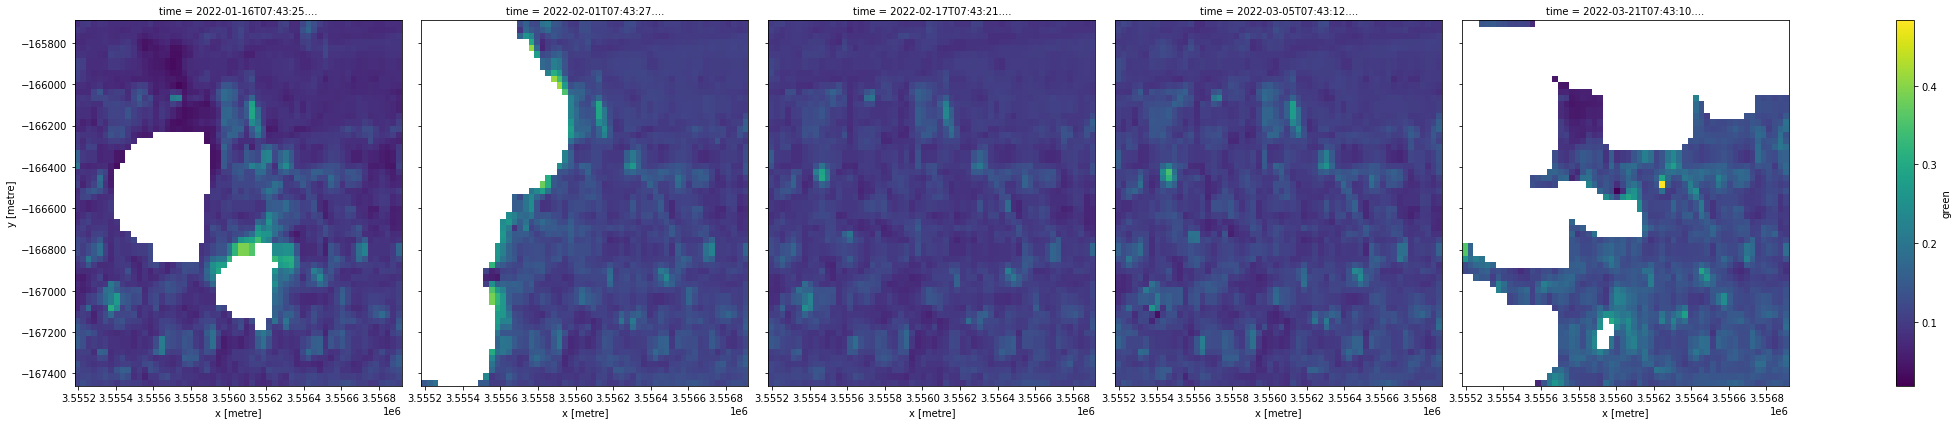

In [8]:
dataset['green'].plot(col='time',size=6)

In [9]:
from deafrica_tools.plotting import rgb

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


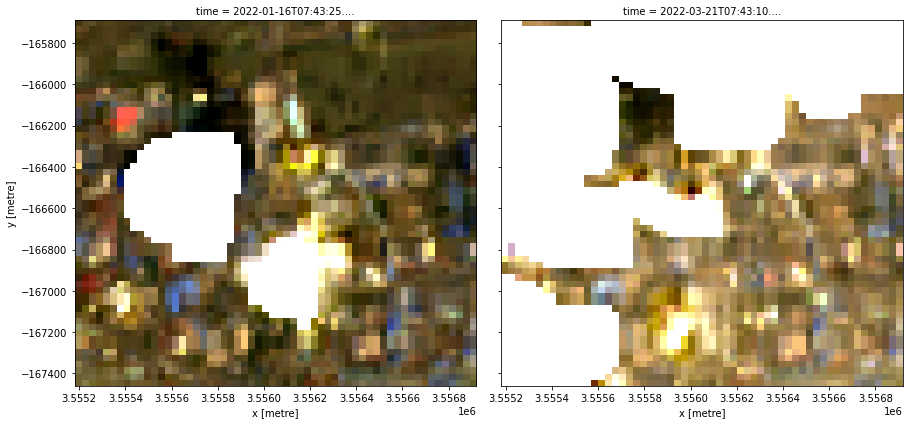

In [10]:
rgb(dataset, index=[0,4], bands=['red','green','blue'])

In [11]:
ndvi= (dataset['nir']-dataset['red'])/(dataset['nir']+dataset['red'])

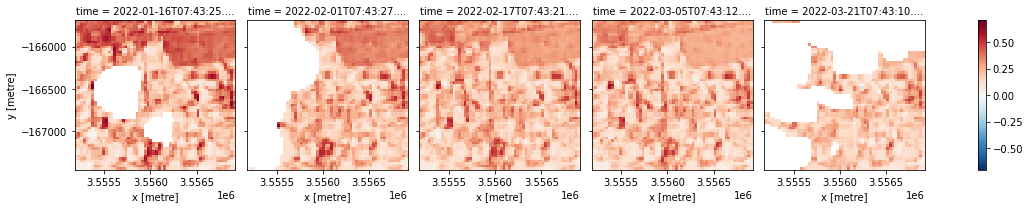

In [12]:
ndvi.plot(col='time')

In [13]:
ndwi=(dataset['green']-dataset['nir'])/(dataset['green']+dataset['nir'])

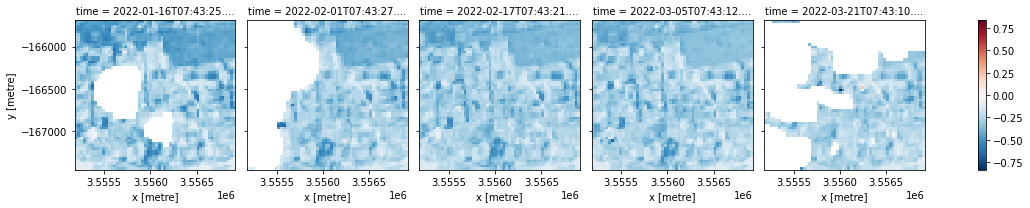

In [14]:
ndwi.plot(col='time')

In [15]:
mndwi=(dataset['green']-dataset['swir_1'])/(dataset['green']+dataset['swir_1'])

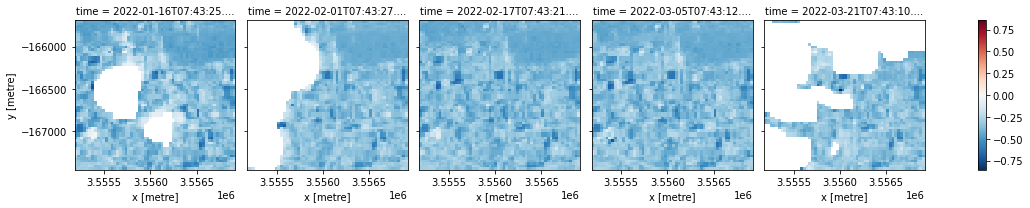

In [16]:
mndwi.plot(col='time')


In [17]:
EVI=(2.5*(dataset['nir']-dataset['red'])/((dataset['nir']+6)*(dataset['red']-7.5)*(dataset['blue']+1)))

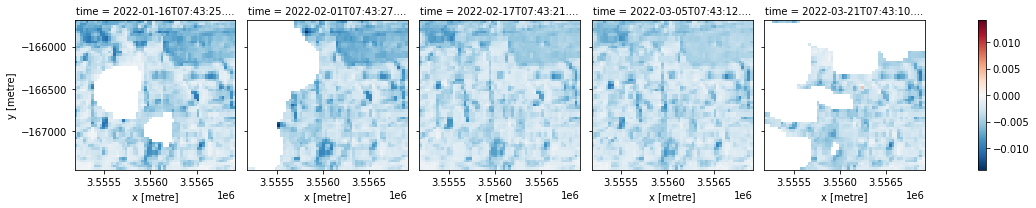

In [18]:
EVI.plot(col='time')

In [19]:
from deafrica_tools.bandindices import calculate_indices 

In [20]:
dataset= calculate_indices(dataset, index= ['EVI','NDWI','NDVI'],
                           satellite_mission= 'ls'
                          )

In [21]:
dataset

<xarray.Dataset>
Dimensions:      (time: 5, y: 59, x: 58)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-16T07:43:25.746992 ... 2022-03...
  * y            (y) float64 -1.657e+05 -1.657e+05 ... -1.674e+05 -1.674e+05
  * x            (x) float64 3.555e+06 3.555e+06 ... 3.557e+06 3.557e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 0.08707 0.1021 0.1068 ... 0.1572 0.1471
    green        (time, y, x) float32 0.07935 0.09177 0.09659 ... 0.1448 0.134
    blue         (time, y, x) float32 0.05223 0.06155 0.06801 ... 0.1033 0.08311
    nir          (time, y, x) float32 0.2167 0.208 0.2374 ... 0.1757 0.1786
    swir_1       (time, y, x) float32 0.1993 0.208 0.2198 ... 0.2266 0.2429
    EVI          (time, y, x) float32 0.2405 0.195 0.2385 ... 0.03437 0.05465
    NDWI         (time, y, x) float32 -0.4639 -0.3878 ... -0.09654 -0.1427
    NDVI         (time, y, x) float32 0.4267 0.3418 0.3793 ... 0.05551 0.09651
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

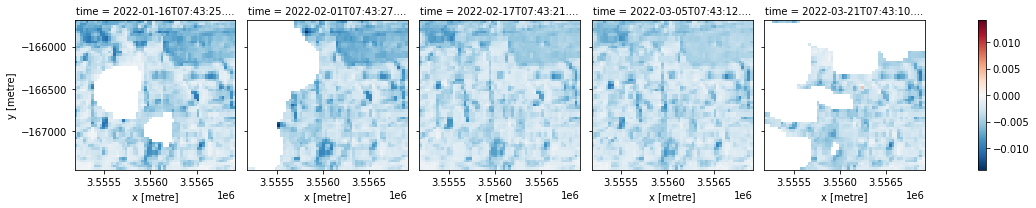

In [22]:
EVI.plot(col='time')

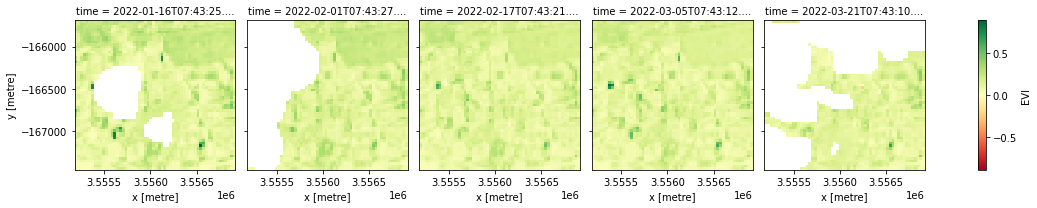

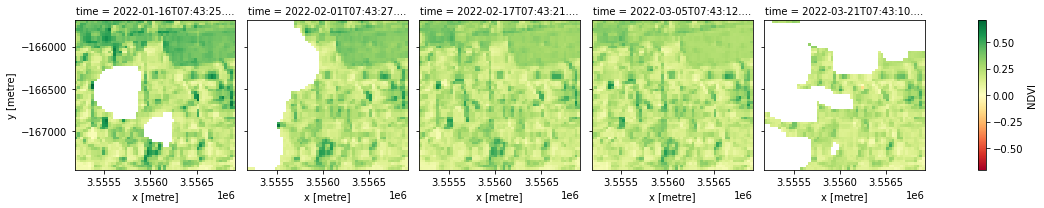

In [23]:
dataset['EVI'].plot(col='time',cmap='RdYlGn')
dataset['NDVI'].plot(col='time',cmap='RdYlGn')

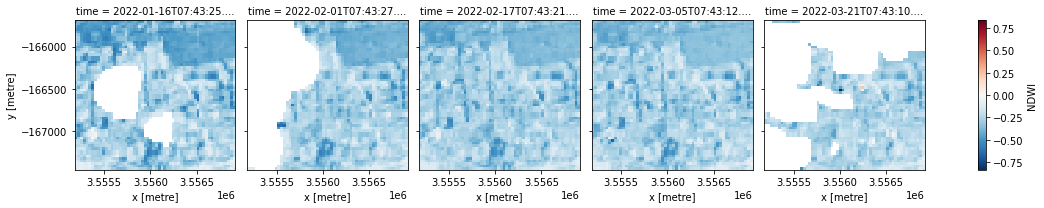

In [24]:
dataset['NDWI'].plot(col='time')

In [25]:
vegindex= dataset['NDVI']. where(dataset['NDVI']>0)

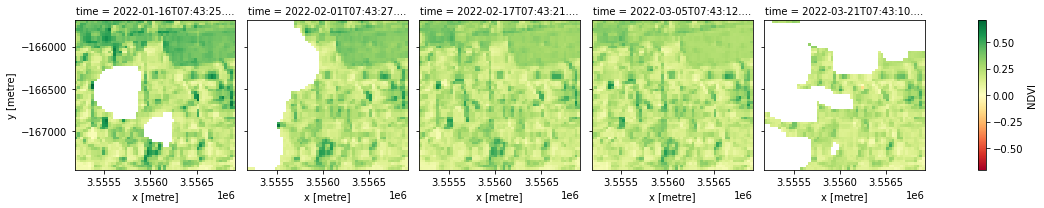

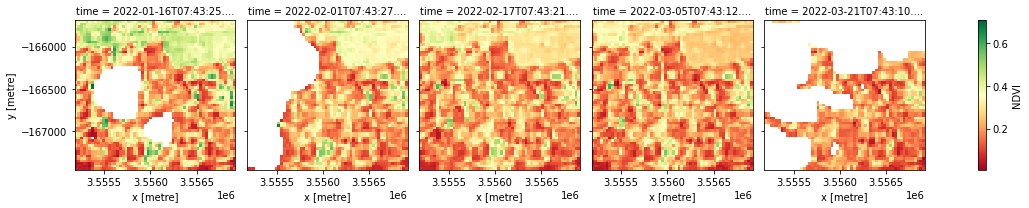

In [26]:
dataset['NDVI'].plot(col='time',cmap='RdYlGn')
vegindex.plot(col='time',cmap='RdYlGn')

In [27]:
vegindex= dataset['NDVI']. where((dataset['NDVI']>0.4)&
(dataset['NDVI']<0.9))


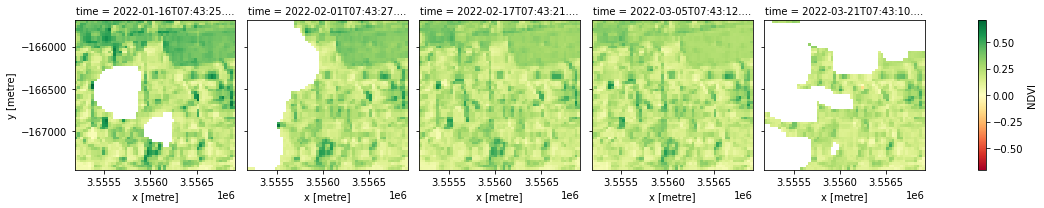

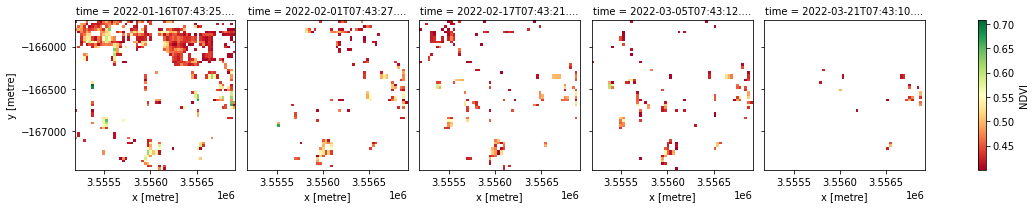

In [28]:
dataset['NDVI'].plot(col='time',cmap='RdYlGn')
vegindex.plot(col='time',cmap='RdYlGn')

In [29]:
veg_mean=vegindex.mean(dim=['x','y'])

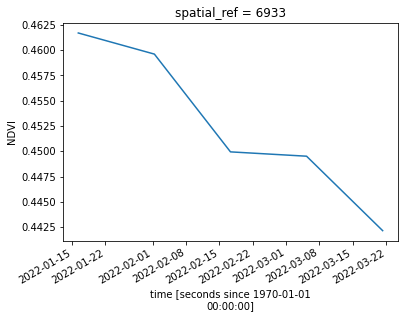

In [30]:
veg_mean.plot()


In [31]:
veg_mean=vegindex.mean(dim=['time'])

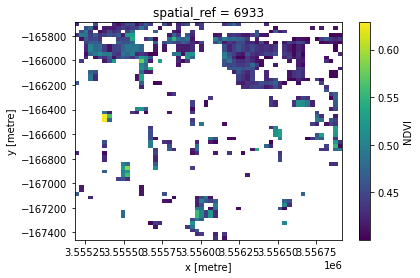

In [32]:
veg_mean.plot()